# 4 编写结构化程序

# 4.1 回到基础

## 1、赋值：
列表赋值是“引用”，改变其中一个，其他都会改变


In [1]:
foo = ["1", "2"]
bar = foo
foo[1] = "3"
print(bar)

['1', '3']


In [2]:
empty = []
nested = [empty, empty, empty]
print(nested)
nested[1].append("3")
print(nested)

[[], [], []]
[['3'], ['3'], ['3']]


In [6]:
nes = [[]] * 3
nes[1].append("3")
print(nes)
nes[1] = ["2"]                # 这里最新赋值时，不会传递给其他元素
print(nes)

[['3'], ['3'], ['3']]
[['3'], ['2'], ['3']]


In [8]:
new = nested[:]
print(new)
new[2] = ["new"]
print(new)
print(nested)

[['3'], ['3'], ['3']]
[['3'], ['3'], ['new']]
[['3'], ['3'], ['3']]


In [13]:
import copy
new2 = copy.deepcopy(nested)
print(new2)
new2[2] = ["new2"]
print(new2)
print(nested)

[['3'], ['3'], ['3']]
[['3'], ['3'], ['new2']]
[['3'], ['3'], ['3']]


## 2、等式
Python提供两种方法来检查一对项目是否相同。

is    操作符测试对象的ID。

==  检测对象是否相等。

In [23]:
snake_nest = [["Python"]] * 5
snake_nest[2] = ['Python']

print(snake_nest)

print(snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])

print(snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])


[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]
True
False


## 3、elif 和 else
if elif  表示 if 为假而且elif 后边为真，表示如果第一个if执行，则不在执行elif

if if     表示无论第一个if是否执行，第二个if都会执行

In [24]:
animals = ["cat", "dog"]
if "cat" in animals:
    print(1)
if "dog" in animals:
    print(2)

1
2


In [25]:
animals = ["cat", "dog"]
if "cat" in animals:
    print(1)
elif "dog" in animals:
    print(2)

1


# 4.2 序列

字符串，列表，元组

## 1、元组 
由逗号隔开，通常使用括号括起来，可以被索引和切片，并且由长度

In [27]:
t = "walk", "fem", 3
print(t)
print(t[0])
print(t[1:])
print(len(t))

('walk', 'fem', 3)
walk
('fem', 3)
3


## 2、序列可以直接相互赋值

In [28]:
words = ["I", "turned", "off", "the", "spectroroute"]
words[1], words[4] = words[4], words[1]
print(words)

['I', 'spectroroute', 'off', 'the', 'turned']


## 3、处理序列的函数
sorted（）函数、reversed（）函数、zip（）函数、enumerate（）函数

In [42]:
print("\n",words)
print(sorted(words))

print("\n",words)
print(reversed(words))
print(list(reversed(words)))

print("\n",words)
print(zip(words, range(len(words))))
print(list(zip(words, range(len(words)))))

print("\n",words)
print(enumerate(words))
print(list(enumerate(words)))


 ['I', 'spectroroute', 'off', 'the', 'turned']
['I', 'off', 'spectroroute', 'the', 'turned']

 ['I', 'spectroroute', 'off', 'the', 'turned']
['turned', 'the', 'off', 'spectroroute', 'I']

 ['I', 'spectroroute', 'off', 'the', 'turned']
[('I', 0), ('spectroroute', 1), ('off', 2), ('the', 3), ('turned', 4)]

 ['I', 'spectroroute', 'off', 'the', 'turned']
[(0, 'I'), (1, 'spectroroute'), (2, 'off'), (3, 'the'), (4, 'turned')]


## 4、合并不同类型的序列

In [43]:
words = "I turned off the spectroroute".split()
print (words)

wordlens = [(len(word), word) for word in words]
print(wordlens)

wordlens.sort()
print (wordlens)

print(" ".join(w for (_, w) in wordlens))

['I', 'turned', 'off', 'the', 'spectroroute']
[(1, 'I'), (6, 'turned'), (3, 'off'), (3, 'the'), (12, 'spectroroute')]
[(1, 'I'), (3, 'off'), (3, 'the'), (6, 'turned'), (12, 'spectroroute')]
I off the turned spectroroute


## 5、生成器表达式

### 5.1、列表推导
我们一直在大量使用列表推导，因为用它处理文本结构紧凑和可读性好。下面是一个例子，分词和规范化一个文本：


In [47]:
from nltk import *
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
... "it means just what I choose it to mean - neither more nor less."'''
print([w.lower() for w in word_tokenize(text)])

['``', 'when', 'i', 'use', 'a', 'word', ',', "''", 'humpty', 'dumpty', 'said', 'in', 'rather', 'a', 'scornful', 'tone', ',', '...', '``', 'it', 'means', 'just', 'what', 'i', 'choose', 'it', 'to', 'mean', '-', 'neither', 'more', 'nor', 'less', '.', "''"]


### 5.2、生成器表达式
第二行使用了生成器表达式。这不仅仅是标记方便：在许多语言处理的案例中，生成器表达式会更高效。

在[1]中，列表对象的存储空间必须在max()的值被计算之前分配。如果文本非常大的，这将会很慢。

在[2]中，数据流向调用它的函数。由于调用的函数只是简单的要找最大值——按字典顺序排在最后的词——它可以处理数据流，而无需存储迄今为止的最大值以外的任何值。

In [48]:
print(max([w.lower() for w in word_tokenize(text)]))
print (max(w.lower() for w in word_tokenize(text)))

word
word


# 4.3 风格的问题

## 1、过程风格与声明风格
计算布朗语料库中词的平均长度的程序:

In [50]:
# 过程风格
import nltk
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In [51]:
# 声明风格
total = sum(len(w) for w in tokens)
print(total / len(tokens))

4.401545438271973


In [56]:
# 过程风格
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
print(longest)

unextinguishable


In [57]:
# 声明风格：使用两个列表推到
maxlen = max(len(word) for word in text)
print([word for word in text if len(word) == maxlen])

['unextinguishable', 'transubstantiate', 'inextinguishable', 'incomprehensible']


In [55]:
# enumerate() 枚举频率分布的值
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %10.2f%% %10s" % (rank + 1, fd.freq(word) * 100, word))
    if cumulative > 0.25:
        break

  1       5.40%        the
  2       5.02%          ,
  3       4.25%          .
  4       3.11%         of
  5       2.40%        and
  6       2.22%         to
  7       1.88%          a
  8       1.68%         in


## 2、计数器的一些合理用途

In [58]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent) - n +1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

## 3、构建多维数组：使用嵌套列表推导和使用对象复制（[ ] * n）

In [62]:
# 使用嵌套列表推导可以修改内容
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add("Alice")
import pprint
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [63]:
# 使用对象复制，修改一个其他的也会改变
array = [[set()] * n] *m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


# 4.4 函数：结构化编程的基础

In [4]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stipping HTML markup"""
    text = open(file).read()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

contents = get_text("4.test.html")
print(contents[:300])

 【Python自然语言处理】读书笔记：第四章：编写结构化程序 /*! * * Twitter Bootstrap * */ /*! * Bootstrap v3.3.7 (http://getbootstrap.com) * Copyright 2011-2016 Twitter, Inc. * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE) */ /*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.cs


In [5]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stipping HTML markup



1、考虑以下三个排序函数。第三个是危险的，因为程序员可能没有意识到它已经修改了给它的输入。一般情况下，函数应该修改参数的内容（my_sort1()）或返回一个值（my_sort2()），而不是两个都做（my_sort3()）。

In [11]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

mylist = [3,2,1]
my_sort1(mylist)
print (mylist,"\n")

mylist = [3,2,1]
print("my_sort2(mylist):",my_sort2(mylist))
print (mylist,"\n")


mylist = [3,2,1]
print("my_sort2(mylist):",my_sort3(mylist))
print (mylist,"\n")



[1, 2, 3] 

my_sort2(mylist): [1, 2, 3]
[3, 2, 1] 

my_sort2(mylist): [1, 2, 3]
[1, 2, 3] 



## 2、参数传递
早在4.1节中，你就已经看到了赋值操作，而一个结构化对象的值是该对象的引用。函数也是一样的。要理解Python按值传递参数，只要了解它是如何赋值的就足够了。【意思就是在函数中赋值的时候如果是结构化对象，那么赋值仅仅是引用，如果是字符串、数值等非结构化的变量，则在函数中改变，仅仅是局部变量改变】

In [16]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

w = ''
p = []
set_up(w, p)
print(w)
print(p)



['noun']


请注意，w没有被函数改变。当我们调用set_up(w, p)时，w（空字符串）的值被分配到一个新的变量word。在函数内部word值被修改。然而，这种变化并没有传播给w。这个参数传递过程与下面的赋值序列是一样的：

In [17]:
w = ''
word = w
word = 'lolcat'
print(w)


让我们来看看列表p上发生了什么。当我们调用set_up(w, p)，p的值（一个空列表的引用）被分配到一个新的本地变量properties，所以现在这两个变量引用相同的内存位置。函数修改properties，而这种变化也反映在p值上，正如我们所看到的。函数也分配给properties一个新的值（数字5）；这并不能修改该内存位置上的内容，而是创建了一个新的局部变量。这种行为就好像是我们做了下列赋值序列：



In [18]:
p = []
properties = p
properties.append('noun')
properties = 5
print(p)


['noun']


## 3、变量的作用域

当你在一个函数体内部使用一个现有的名字时，Python解释器先尝试按照函数本地的名字来解释。如果没有发现，解释器检查它是否是一个模块内的全局名称。最后，如果没有成功，解释器会检查是否是Python内置的名字。这就是所谓的名称解析的LGB规则：本地（local），全局（global），然后内置（built-in）。

## 4、参数类型检查
我们写程序时，Python不会强迫我们声明变量的类型，这允许我们定义参数类型灵活的函数。例如，我们可能希望一个标注只是一个词序列，而不管这个序列被表示为一个列表、元组（或是迭代器，一种新的序列类型，超出了当前的讨论范围）。

然而，我们常常想写一些能被他人利用的程序，并希望以一种防守的风格，当函数没有被正确调用时提供有益的警告。下面的tag()函数的作者假设其参数将始终是一个字符串。

In [19]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

print(tag('the'))

print(tag('knight'))

print(tag(["'Tis", 'but', 'a', 'scratch']))


det
noun
noun


该函数对参数'the'和'knight'返回合理的值，传递给它一个列表[1]，看看会发生什么——它没有抱怨，虽然它返回的结果显然是不正确的。此函数的作者可以采取一些额外的步骤来确保tag()函数的参数word是一个字符串。一种直白的做法是使用if not type(word) is str检查参数的类型，如果word不是一个字符串，简单地返回Python特殊的空值None。这是一个略微的改善，因为该函数在检查参数类型，并试图对错误的输入返回一个“特殊的”诊断结果。然而，它也是危险的，因为调用程序可能不会检测None是故意设定的“特殊”值，这种诊断的返回值可能被传播到程序的其他部分产生不可预测的后果。如果这个词是一个Unicode字符串这种方法也会失败。因为它的类型是unicode而不是str。这里有一个更好的解决方案，使用assert语句和Python的basestring的类型一起，它是unicode和str的共同类型。

In [22]:
def tag(word):
    assert isinstance(word, str), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

print(tag(["'Tis", 'but', 'a', 'scratch']))


AssertionError: argument to tag() must be a string

如果assert语句失败，它会产生一个不可忽视的错误而停止程序执行。此外，该错误信息是容易理解的。程序中添加断言能帮助你找到逻辑错误，是一种防御性编程。一个更根本的方法是在本节后面描述的使用文档字符串为每个函数记录参数的文档。

## 5、功能分解
当我们使用函数时,主程序可以在一个更高的抽象水平编写,使其结构更透明,例如:

In [26]:
import nltk
tokens = nltk.corpus.brown.words(categories='news')
total = sum(len(w) for w in tokens)
print(total / len(tokens))

4.401545438271973


思考例 4-2 中 freq_words 函数。它更新一个作为参数传递进来的频率分布的内容,并输出前 n 个最频繁的词的链表。

例 4-2. 设计不佳的函数用来计算高频词。

In [40]:
from nltk import *
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html).get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)
constitution = "http://www.archives.gov/national-archives-experience" \
"/charters/constitution_transcript.html"
fd = nltk.FreqDist()
print([w for (w, _) in fd.most_common(20)])
freq_words(constitution, fd, 20)
print("\n",[w for (w, _) in fd.most_common(30)])

[]
["''", ',', ':1', 'the', ':', 'of', '{', ';', '}', '(', ')', "'", 'archives', 'and', '.', '[', ']', '``', 'national', 'documents']

 ["''", ',', ':1', 'the', ':', 'of', '{', ';', '}', '(', ')', "'", 'archives', 'and', '.', '[', ']', '``', 'national', 'documents', 'founding', '#', 'to', 'declaration', 'constitution', 'a', 'visit', 'online', 'freedom', 'for']


这个函数有几个问题。该函数有两个副作用：它修改了第二个参数的内容，并输出它已计算的结果的经过选择的子集。如果我们在函数内部初始化FreqDist()对象（在它被处理的同一个地方），并且去掉选择集而将结果显示给调用程序的话，函数会更容易理解和更容易在其他地方重用。考虑到它的任务是找出频繁的一个词，它应该只应该返回一个列表，而不是整个频率分布。在4.4中，我们重构此函数，并通过去掉freqdist参数简化其接口。

In [45]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html).get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in freqdist.most_common(n)]

constitution = "http://www.archives.gov/national-archives-experience" \
"/charters/constitution_transcript.html"
print(freq_words(constitution, 20))

["''", ',', ':1', 'the', ':', 'of', '{', ';', '}', '(', ')', "'", 'archives', 'and', '.', '[', ']', '``', 'national', 'documents']


## 6、编写函数的文档
在函数的定义顶部的文档字符串中提供这些描述。这个说明不应该解释函数是如何实现的；实际上，应该能够不改变这个说明，使用不同的方法，重新实现这个函数。

In [46]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

# 4.5 更多关于函数

## 1、作为参数的函数

到目前为止，我们传递给函数的参数一直都是简单的对象，如字符串或列表等结构化对象。Python也允许我们传递一个函数作为另一个函数的参数。现在，我们可以抽象出操作，对相同数据进行不同操作。正如下面的例子表示的，我们可以传递内置函数len()或用户定义的函数last_letter()作为另一个函数的参数：

In [2]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]

print(extract_property(len))

def last_letter(word):
    return word[-1]

print(extract_property(last_letter))

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]
['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']


对象len和last_letter可以像列表和字典那样被传递。请注意，只有在我们调用该函数时，才在函数名后使用括号；当我们只是将函数作为一个对象，括号被省略。

Python提供了更多的方式来定义函数作为其他函数的参数，即所谓的lambda 表达式。试想在很多地方没有必要使用上述的last_letter()函数，因此没有必要给它一个名字。我们可以等价地写以下内容：

In [3]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

我们的下一个例子演示传递一个函数给sorted()函数。当我们用唯一的参数（需要排序的链表）调用后者，它使用内置的比较函数cmp()。然而，我们可以提供自己的排序函数，例如按长度递减排序。

In [15]:
print(sorted(sent))

print(sorted(sent, key = lambda x:x[-1]))

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']
[',', '.', 'and', 'Take', 'care', 'the', 'sense', 'the', 'take', 'care', 'of', 'of', 'will', 'sounds', 'themselves']


## 2、累计函数

这些函数以初始化一些存储开始，迭代和处理输入的数据，最后返回一些最终的对象（一个大的结构或汇总的结果）。做到这一点的一个标准的方式是初始化一个空链表，累计材料，然后返回这个链表，如4.6中所示函数search1()。

In [20]:
import nltk

def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
            
for item in search1('fizzled', nltk.corpus.brown.words()):
    print (item)

for item in search2('Grizzlies', nltk.corpus.brown.words()):
    print (item)

fizzled
Grizzlies'


函数search2()是一个生成器。第一次调用此函数，它运行到yield语句然后停下来。调用程序获得第一个词，完成任何必要的处理。一旦调用程序对另一个词做好准备，函数会从停下来的地方继续执行，直到再次遇到yield语句。这种方法通常更有效，因为函数只产生调用程序需要的数据，并不需要分配额外的内存来存储输出（参见前面关于生成器表达式的讨论）。

下面是一个更复杂的生成器的例子，产生一个词列表的所有排列。为了强制permutations()函数产生所有它的输出，我们将它包装在list()调用中[1]。

In [21]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

permutations函数使用了一种技术叫递归，将在下面4.7讨论。产生一组词的排列对于创建测试一个语法的数据十分有用（8.)。

## 3、高阶函数

### filter()
我们使用函数作为filter()的第一个参数，它对作为它的第二个参数的序列中的每个项目运用该函数，只保留该函数返回True的项目。

In [22]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

### map()
将一个函数运用到一个序列中的每一项。

In [23]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
print(sum(lengths) / len(lengths))


lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
print(sum(lengths) / len(lengths))

21.75081116158339
21.75081116158339


### lambda 表达式
这里是两个等效的例子，计数每个词中的元音的数量。

In [30]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [32]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

列表推导为基础的解决方案通常比基于高阶函数的解决方案可读性更好，我们在整个这本书的青睐于使用前者。

## 4、命名的参数
当有很多参数时，很容易混淆正确的顺序。我们可以通过名字引用参数，甚至可以给它们分配默认值以供调用程序没有提供该参数时使用。现在参数可以按任意顺序指定，也可以省略。

In [33]:
def repeat(msg='<empty>', num=1):
    return msg * num
print(repeat(num=3))

print(repeat(msg='Alice'))

print(repeat(num=5, msg='Alice'))


<empty><empty><empty>
Alice
AliceAliceAliceAliceAlice


### *args作为函数参数

In [35]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]
print(song[0])
print(list(zip(song[0], song[1], song[2])))

print(list(zip(*song)))

['four', 'calling', 'birds']
[('four', 'three', 'two'), ('calling', 'French', 'turtle'), ('birds', 'hens', 'doves')]
[('four', 'three', 'two'), ('calling', 'French', 'turtle'), ('birds', 'hens', 'doves')]


应该从这个例子中明白输入*song仅仅是一个方便的记号，相当于输入了song[0], song[1], song[2]。

### 命名参数的另一个作用是它们允许选择性使用参数。

In [37]:
from nltk import *
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)
fw = freq_words('4.test.html', 4, 10)
fw = freq_words('4.test.html', min=4, num=10)
fw = freq_words('4.test.html', num=10, min=4)

### 可选参数的另一个常见用途是作为标志使用。
这里是同一个的函数的修订版本，如果设置了verbose标志将会报告其进展情况：

In [39]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    with open(file) as f:
        text = f.read()
        if verbose: print("Read in %d characters" % len(file))
        for word in word_tokenize(text):
            if len(word) >= min:
                freqdist[word] += 1
                if verbose and freqdist.N() % 100 == 0: print(".", sep="",end = " ")
        if verbose: print
        return freqdist.most_common(num)
fw = freq_words("4.test.html", 4 ,10, True)

Opening 4.test.html
Read in 11 characters
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### 注意
注意不要使用可变对象作为参数的默认值。这个函数的一系列调用将使用同一个对象，有时会出现离奇的结果，就像我们稍后会在关于调试的讨论中看到的那样。

### 注意
如果你的程序将使用大量的文件，它是一个好主意来关闭任何一旦不再需要的已经打开的文件。如果你使用with语句，Python会自动关闭打开的文件︰

In [42]:
with open("4.test.html") as f:
    data = f.read()

# 4.6 程序开发

编程是一种技能，需要获得几年的各种编程语言和任务的经验。

**关键的高层次能力**：是算法设计及其在结构化编程中的实现。

**关键的低层次的能力**包括熟悉语言的语法结构，以及排除故障的程序（不能表现预期的行为的程序）的各种诊断方法的知识。

## 1、Python模块的结构

与其他NLTK的模块一样，distance.py以一组注释行开始，包括一行模块标题和作者信息。

（由于代码会被发布，也包括代码可用的URL、版权声明和许可信息。）

接下来是模块级的文档字符串，三重引号的多行字符串，其中包括当有人输入help(nltk.metrics.distance)将被输出的关于模块的信息。

In [50]:
# Natural Language Toolkit: Distance Metrics
#
# Copyright (C) 2001-2013 NLTK Project
# Author: Edward Loper <edloper@gmail.com>
#         Steven Bird <stevenbird1@gmail.com>
#         Tom Lippincott <tom@cs.columbia.edu>
# URL: <http://nltk.org/>
# For license information, see LICENSE.TXT
#

"""
Distance Metrics.

Compute the distance between two items (usually strings).
As metrics, they must satisfy the following three requirements:

1. d(a, a) = 0
2. d(a, b) >= 0
3. d(a, c) <= d(a, b) + d(b, c)
"""

'\nDistance Metrics.\n\nCompute the distance between two items (usually strings).\nAs metrics, they must satisfy the following three requirements:\n\n1. d(a, a) = 0\n2. d(a, b) >= 0\n3. d(a, c) <= d(a, b) + d(b, c)\n'

## 2、多模块程序
一些程序汇集多种任务，例如从语料库加载数据、对数据进行一些分析、然后将其可视化。我们可能已经有了稳定的模块来加载数据和实现数据可视化。我们的工作可能会涉及到那些分析任务的编码，只是从现有的模块调用一些函数。4.7描述了这种情景。
![4.1](./picture/4.1.png)

## 3、错误源头
首先，输入的数据可能包含一些意想不到的字符。

第二，提供的函数可能不会像预期的那样运作。

第三，我们对Python语义的理解可能出错。

In [54]:
print("%s.%s.%02d" % "ph.d.", "n", 1)

TypeError: not enough arguments for format string

In [55]:
print("%s.%s.%02d" % ("ph.d.", "n", 1))

ph.d..n.01


### 在函数中命名参数不能设置列表等对象
程序的行为并不如预期，因为我们错误地认为在函数被调用时会创建默认值。然而，它只创建了一次，在Python解释器加载这个函数时。这一个列表对象会被使用，只要没有给函数提供明确的值。

In [58]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) )

print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur']) )

print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) )  # 明显错误


['omg', 'teh', 'teh', 'mat']
['ur', 'on']
['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']


## 4、调试技术
1.由于大多数代码错误是因为程序员的不正确的假设，你检测bug要做的第一件事是检查你的假设。通过给程序添加print语句定位问题，显示重要的变量的值，并显示程序的进展程度。

2.解释器会输出一个堆栈跟踪，精确定位错误发生时程序执行的位置。

3.Python提供了一个调试器，它允许你监视程序的执行，指定程序暂停运行的行号（即断点），逐步调试代码段和检查变量的值。你可以如下方式在你的代码中调用调试器：

In [59]:
import pdb
print(find_words(['cat'], 3)) # [_first-run]

pdb.run("find_words(['dog'], 3)") # [_second-run]

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']
> <string>(1)<module>()
(Pdb) step
--Call--
> <ipython-input-58-510e58e9f243>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) step
> <ipython-input-58-510e58e9f243>(2)find_words()
-> for word in text:
(Pdb) args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']
(Pdb) next
> <ipython-input-58-510e58e9f243>(3)find_words()
-> if len(word) == wordlength:
(Pdb) b
(Pdb) c


它会给出一个提示(Pdb)，你可以在那里输入指令给调试器。输入help来查看命令的完整列表。输入step(或只输入s)将执行当前行然后停止。如果当前行调用一个函数，它将进入这个函数并停止在第一行。输入next(或只输入n)是类似的，但它会在当前函数中的下一行停止执行。break（或b）命令可用于创建或列出断点。输入continue（或c）会继续执行直到遇到下一个断点。输入任何变量的名称可以检查它的值。

## 5、防御性编程

1.考虑在你的代码中添加assert语句，指定变量的属性，例如assert(isinstance(text, list))。如果text的值在你的代码被用在一些较大的环境中时变为了一个字符串，将产生一个AssertionError，于是你会立即得到问题的通知。

2.一旦你觉得你发现了错误，作为一个假设查看你的解决方案。在重新运行该程序之前尝试预测你修正错误的影响。如果bug不能被修正，不要陷入盲目修改代码希望它会奇迹般地重新开始运作的陷阱。相反，每一次修改都要尝试阐明错误是什么和为什么这样修改会解决这个问题的假设。如果这个问题没有解决就撤消这次修改。

3.当你开发你的程序时，扩展其功能，并修复所有bug，维护一套测试用例是有益的。这被称为回归测试，因为它是用来检测代码“回归”的地方——修改代码后会带来一个意想不到的副作用是以前能运作的程序不运作了的地方。Python以doctest模块的形式提供了一个简单的回归测试框架。这个模块搜索一个代码或文档文件查找类似与交互式Python会话这样的文本块，这种形式你已经在这本书中看到了很多次。它执行找到的Python命令，测试其输出是否与原始文件中所提供的输出匹配。每当有不匹配时，它会报告预期值和实际值。有关详情，请查询在 documentation at http://docs.python.org/library/doctest.html 上的doctest文档。除了回归测试它的值，doctest模块有助于确保你的软件文档与你的代码保持同步。

4.也许最重要的防御性编程策略是要清楚的表述你的代码，选择有意义的变量和函数名，并通过将代码分解成拥有良好文档的接口的函数和模块尽可能的简化代码。

# 4.7 算法设计
解决算法问题的一个重要部分是为手头的问题选择或改造一个合适的算法。有时会有几种选择，能否选择最好的一个取决于对每个选择随数据增长如何执行的知识。

算法设计的另一种方法，我们解决问题通过将它转化为一个我们已经知道如何解决的问题的一个实例。例如，为了检测列表中的重复项，我们可以预排序这个列表，然后通过一次扫描检查是否有相邻的两个元素是相同的。

## 1、迭代与递归
例如，假设我们有n个词，要计算出它们结合在一起有多少不同的方式能组成一个词序列。

### 迭代
如果我们只有一个词（n=1），只是一种方式组成一个序列。如果我们有2个词，就有2种方式将它们组成一个序列。3个词有6种可能性。一般的，n个词有n × n-1 × … × 2 × 1种方式（即n的阶乘）。我们可以将这些编写成如下代码：

In [61]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

### 递归
假设我们有办法为n-1 不同的词构建所有的排列。然后对于每个这样的排列，有n个地方我们可以插入一个新词：开始、结束或任意两个词之间的n-2个空隙。因此，我们简单的将n-1个词的解决方案数乘以n的值。我们还需要基础案例，也就是说，如果我们有一个词，只有一个顺序。我们可以将这些编写成如下代码：



In [62]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

尽管递归编程结构简单，但它是有代价的。每次函数调用时，一些状态信息需要推入堆栈，这样一旦函数执行完成可以从离开的地方继续执行。出于这个原因，迭代的解决方案往往比递归解决方案的更高效。

## 2、权衡空间与时间
我们有时可以显著的加快程序的执行，通过建设一个辅助的数据结构，例如索引。4.10实现一个简单的电影评论语料库的全文检索系统。通过索引文档集合，它提供更快的查找。

In [66]:
def raw(file):
    with open(file) as f:
        contents = f.read()
        contents = re.sub(r"<.*?>", " ", contents)
        contents = re.sub("\s+", " ", contents)
        return contents

def snippet(doc, term):
    text = " "*30 + raw(doc) + " "*30
    pos = text.index(term)
    return text[pos - 30 : pos + 30]


print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())


query = " "
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")







Building Index...
query> so what does joe do
Not found
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off t

一个更微妙的空间与时间折中的例子涉及使用整数标识符替换一个语料库的词符。我们为语料库创建一个词汇表，每个词都被存储一次的列表，然后转化这个列表以便我们能通过查找任意词来找到它的标识符。每个文档都进行预处理，使一个词列表变成一个整数列表。现在所有的语言模型都可以使用整数。见4.11中的内容，如何为一个已标注的语料库做这个的例子的列表。

In [67]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

### 集合中的元素会自动索引，所以测试一个大的集合的成员将远远快于测试相应的列表的成员。
空间时间权衡的另一个例子是维护一个词汇表。如果你需要处理一段输入文本检查所有的词是否在现有的词汇表中，词汇表应存储为一个集合，而不是一个列表。集合中的元素会自动索引，所以测试一个大的集合的成员将远远快于测试相应的列表的成员。

我们可以使用timeit模块测试这种说法。Timer类有两个参数：一个是多次执行的语句，一个是只在开始执行一次的设置代码。我们将分别使用一个整数的列表[1]和一个整数的集合[2]模拟10 万个项目的词汇表。测试语句将产生一个随机项，它有50％的机会在词汇表中[3]。

In [68]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size          #[1]
setup_set = "import random; vocab = set(range(%d))" % vocab_size   #[2]
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)     #[3]
print(Timer(statement, setup_list).timeit(1000))

print(Timer(statement, setup_set).timeit(1000))


0.024326185999598238
0.005347012998754508


执行1000 次链表成员资格测试总共需要2.8秒，而在集合上的等效试验仅需0.0037 秒，也就是说快了三个数量级！

## 3、动态规划
动态规划(Dynamic programming)是一种自然语言处理中被广泛使用的算法设计的一
般方法。
“programming”一词的用法与你可能想到的感觉不同,是规划或调度的意思。动态
规划用于解决包含多个重叠的子问题的问题。不是反复计算这些子问题,而是简单的将它们
的计算结果存储在一个查找表中。在本节的余下部分,我们将介绍动态规划,但在一个相当
不同的背景:句法分析,下介绍。

Pingala 是大约生活在公元前 5 世纪的印度作家,作品有被称为《Chandas Shastra》的
梵文韵律专著。Virahanka 大约在公元 6 世纪延续了这项工作,研究短音节和长音节组合产
生一个长度为 n 的旋律的组合数。短音节,标记为 S,占一个长度单位,而长音节,标记为
L,占 2 个长度单位。Pingala 发现,例如:有 5 种方式构造一个长度为 4 的旋律:V 4 = {L
L, SSL, SLS, LSS, SSSS}。请看,我们可以将 V 4 分成两个子集,以 L 开始的子集和以 S
开始的子集,如(1)所示。


In [ ]:
(1) V 4 =
    LL, LSS
        i.e. L prefixed to each item of V 2 = {L, SS}
    SSL, SLS, SSSS
        i.e. S prefixed to each item of V 3 = {SL, LS, SSS}
V1 = { S}
V0 = {""}

有了这个观察结果,我们可以写一个小的递归函数称为 virahanka1()来计算这些旋
律,如例 4-9 所示。请注意,要计算 V 4 ,我们先要计算 V 3 和 V 2 。但要计算 V 3 ,我们先要
计算 V 2 和 V 1 。在(2)中描述了这种调用结构。

例 4-9. 四种方法计算梵文旋律:
(一)迭代(递归);
(二)自底向上的动态规划;
(三)自上而下的动态规划;
(四)内置默记法。

In [74]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
    return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

             
def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n - 1)]
        l = ["L" + prosody for prosody in virahanka3(n - 2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n - 1)]
        l = ["L" + prosody for prosody in virahanka4(n - 2)]
        return s + l

print(virahanka1(4))

print(virahanka2(4))

print(virahanka3(4))

print(virahanka4(4))


['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']


### 法1.递归（迭代）
正如你可以看到,V 2 计算了两次。这看上去可能并不像是一个重大的问题,但事实证
明,当 n 变大时使用这种递归技术计算 V 20 ,我们将计算 V 2 4,181 次;对 V 40 我们将计算 V 2
63245986 次!
### 法2.动态规划（自下而上）
函数 virahanka2()实现动态规划方法解决这个问题。它的工作原
理是使用问题的所有较小的实例的计算结果填充一个表格(叫做 lookup),一旦我们得到
了我们感兴趣的值就立即停止。此时,我们读出值,并返回它。最重要的是,每个子问题只
计算了一次。
### 法3.动态规划（自上而下）
请注意,virahanka2()所采取的办法是解决较大问题前先解决较小的问题。因此,这
被称为自下而上的方法进行动态规划。不幸的是,对于某些应用它还是相当浪费资源的,因
为它计算的一些子问题在解决主问题时可能并不需要。采用自上而下的方法进行动态规划可
避免这种计算的浪费,如例 4-9 中函数 virahanka3()所示。不同于自下而上的方法,这种
方法是递归的。通过检查是否先前已存储了结果,它避免了 virahanka1()的巨大浪费。如
果没有存储,就递归的计算结果,并将结果存储在表中。最后一步返回存储的结果。
### 法4.内置默记法
最后一
种方法,invirahanka4(),使用一个 Python 的“装饰器”称为默记法(memoize),它会
做 virahanka3()所做的繁琐的工作而不会搞乱程序。这种“默记”过程中会存储每次函数
调用的结果以及使用到的参数。如果随后的函数调用了同样的参数,它会返回存储的结果,
而不是重新计算。(这方面的 Python 语法超出了本书的范围。)

# 4.8 Python 库的样例

例 4-10. 布朗语料库中不同部分的情态动词频率。

{'news': [93, 86, 66, 38, 50, 389], 'religion': [82, 59, 78, 12, 54, 71], 'hobbies': [268, 58, 131, 22, 83, 264], 'government': [117, 38, 153, 13, 102, 244], 'adventure': [46, 151, 5, 58, 27, 50]}


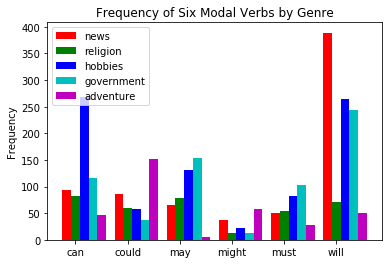

In [85]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

## 1、NetworkX
NetworkX包定义和操作被称为图的由节点和边组成的结构。（略）

## 2、csv
语言分析工作往往涉及数据统计表，包括有关词项的信息、试验研究的参与者名单或从语料库提取的语言特征。这里有一个CSV格式的简单的词典片段：
sleep, sli:p, v.i, a condition of body and mind ...
walk, wo:k, v.intr, progress by lifting and setting down each foot ...
wake, weik, intrans, cease to sleep

我们可以使用Python的CSV库读写这种格式存储的文件。例如，我们可以打开一个叫做lexicon.csv的CSV 文件[1]，并遍历它的行[2]：



In [ ]:
>>> import csv
>>> input_file = open("lexicon.csv", "rb") 
>>> for row in csv.reader(input_file): 
...     print(row)
['sleep', 'sli:p', 'v.i', 'a condition of body and mind ...']
['walk', 'wo:k', 'v.intr', 'progress by lifting and setting down each foot ...']
['wake', 'weik', 'intrans', 'cease to sleep']


每一行是一个字符串列表。如果字段包含有数值数据，它们将作为字符串出现，所以都必须使用int()或float()转换。

## 3、NumPy
NumPy包对Python中的数值处理提供了大量的支持。NumPy有一个多维数组对象，它可以很容易初始化和访问：

In [99]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
               [[6,6,6], [7,7,7], [8,8,8]] ])

print(cube[1,1,1],"\n")

print(cube[2].transpose(),"\n")

print(cube[2,1:],"\n")


4 

[[6 7 8]
 [6 7 8]
 [6 7 8]] 

[[7 7 7]
 [8 8 8]] 



NumPy包括线性代数函数。在这里我们进行矩阵的奇异值分解，潜在语义分析中使用的操作，它能帮助识别一个文档集合中的隐含概念。

In [102]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
print(u,"\n\n",s,"\n\n",vt)

[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]] 

 [ 6.32455532  3.16227766] 

 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


NLTK中的聚类包nltk.cluster中广泛使用NumPy数组，支持包括k-means聚类、高斯EM聚类、组平均凝聚聚类以及聚类分析图。有关详细信息，请输入help(nltk.cluster)。

## 4、其他Python库
还有许多其他的Python库，你可以使用http://pypi.python.org/ 处的Python包索引找到它们。许多库提供了外部软件接口，例如关系数据库（如mysql-python）和大数据集合（如PyLucene）。许多其他库能访问各种文件格式，如PDF、MSWord 和XML（pypdf, pywin32, xml.etree）、RSS 源（如feedparser）以及电子邮箱（如imaplib, email）。